# Logistic Regression to study Breast Cancer Cells

Name : Shadeeb Hossain

Importing the libraries

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model,preprocessing

 Loading the data

In [ ]:
names=['id','thick', 'size_unif','marg','cell_size','bare','chrom','normal','mit','class']
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' +
                 'breast-cancer-wisconsin/breast-cancer-wisconsin.data',names=names,na_values='?',header=None)
df=df.dropna()
df.head(10)

,id,thick,size_unif,marg,cell_size,bare,chrom,normal,mit,class
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2
1017122,8,10,10,8,7,10.0,9,7,1,4
1018099,1,1,1,1,2,10.0,3,1,1,2
1018561,2,1,2,1,2,1.0,3,1,1,2
1033078,2,1,1,1,2,1.0,1,1,5,2
1033078,4,2,1,1,2,1.0,2,1,1,2


*Comparing malignant or benign cells ('class') for two variables "Size_unif" and "marg"*

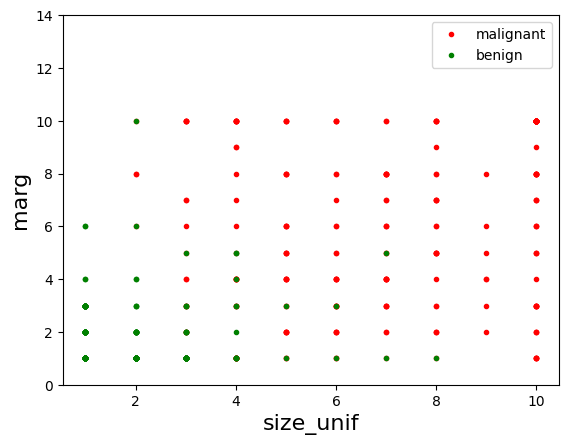

In [ ]:
yraw=np.array(df['class'])
BEN_VAL=2 # value in 'class' label for benign samples
MAL_VAL=4 # value in 'class' label for malignant samples
y=(yraw == MAL_VAL).astype(int)
Iben=(y==0)
Imal=(y==1)

# Get two predictors
xnames= ['size_unif','marg']
X=np.array(df[xnames])

# Scatter plot
plt.plot(X[Imal,0],X[Imal,1],'r.')
plt.plot(X[Iben,0],X[Iben,1],'g.')
plt.xlabel(xnames[0],fontsize=16)
plt.ylabel(xnames[1],fontsize=16)
plt.ylim(0,14)
plt.legend(['malignant','benign'],loc='upper right')

Write a function that makes a prediction yhat based on the class label y.


Measure the accuracy


In [ ]:
# Linear classifier: if size_unif+marg <=4.5, benign

def simple_classifier (features):
  return (features [:,0]+features [:,1])>4.5

yhat=simple_classifier(X)
accuracy=np.mean(yhat==y)
print(accuracy)

0.9267935578330894


Creating the Logistic Regression

<ipython-input-5-59a7731584e4>:16: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x,yp,c=yp,edgecolors='none',marker='+')


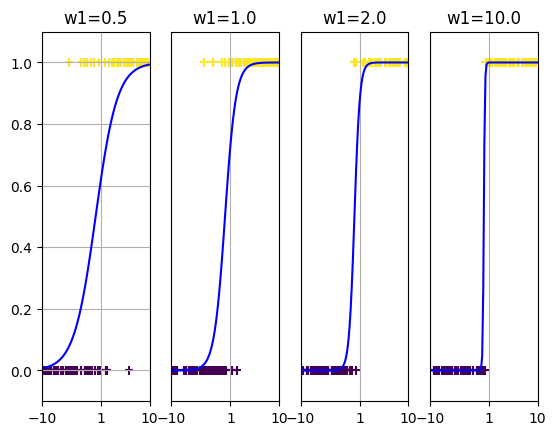

In [ ]:
nx=100
xm=10
w1s=([0.5,1,2,10])
nplot=len(w1s)
iplot=0

for w1 in w1s:
  iplot+=1
  x=np.random.uniform(-xm,xm,nx)
  plt.subplot(1,nplot,iplot)
  py=1/(1+np.exp(-w1*x))
  yp=np.array(np.random.rand(nx)<py)
  xp=np.linspace(-xm,xm,100)
  pyp=1/(1+np.exp(-w1*xp))

  plt.scatter(x,yp,c=yp,edgecolors='none',marker='+')
  plt.plot(xp,pyp,'b-')
  plt.axis([-xm,xm,-0.1,1.1])
  plt.grid()
  if (iplot>1):
    plt.yticks([])

  plt.xticks([-10,1,10])
  plt.title('w1={0:.1f}'.format(w1))

Fitting the data for 'size_unif' and 'marg'

In [ ]:
xnames=['size_unif','marg']
X=np.array(df[xnames])
print(X.shape)

(683, 2)


In [ ]:
#Splitting the data into training and testing

from sklearn.model_selection import train_test_split
Xtr,Xts,ytr,yts=train_test_split(X,y,test_size=0.30)

In [ ]:
# Scalling before fitting

from sklearn.preprocessing import StandardScaler

scal=StandardScaler()
Xtr1=scal.fit_transform(Xtr)
Xts1=scal.transform(Xts)

Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function , discouraging the model from assigning too much importance to individual features.


C states the level of regularization.

Higher values means less regularization.



In [ ]:
reg=linear_model.LogisticRegression(C=1e15)
reg.fit(Xtr1,ytr)

LogisticRegression(C=1000000000000000.0)

Measuring the **accuracy**

In [ ]:
t=reg.predict(Xts1)
acc=np.mean(t==yts)
print("Accuracy of test data = %f" %acc)

Accuracy of test data = 0.907317


*One way of improving the plot is to draw circles on each point whose size is proportional to the count of samples at that point*

Fitting the model for all the variables

In [ ]:
xnames=names[1:-1]   # because you want to omit the first and last column
X=np.array(df[xnames])
print(X.shape)

#Split in training and testing data
Xtr,Xts,ytr,yts=train_test_split(X,y,test_size=0.3)

(683, 8)


We scale the training and the test dataset.

Fit the model on the training data

Score on the test data

Measure the accuracy

In [ ]:
scal=StandardScaler()
Xtr1=scal.fit_transform(Xtr)
Xts1=scal.transform(Xts)
# Fit on the scaled  trained data
reg=linear_model.LogisticRegression(C=1e5)
reg.fit(Xtr1,ytr)

LogisticRegression(C=100000.0)

In [ ]:
# Measuring the accuracy
yhat=reg.predict(Xts1)
acc=np.mean(yhat==yts)
print("Accuracy on the test data= %f" %acc)

Accuracy on the test data= 0.960976


It is important to print the weights of each feature .

We can use pandas package to make a table

In [ ]:
w=reg.coef_
data={'feature':xnames,'slope':np.squeeze(w)}
dfslope=pd.DataFrame(data=data)
dfslope

,feature,slope
0,thick,0.459299
1,size_unif,0.974558
2,marg,0.994335
3,cell_size,0.558461
4,bare,1.455747
5,chrom,2.028678
6,normal,0.689492
7,mit,1.484976


**K fold validation **

To evaluate the performance of some models on a dataset, the most common is MSE. However, the drawback of using only one testing set is that the MSE can vary greatly depending on which observations were used in the training.
So k-fold cross validation is to fit the model several times using a different training and testing set each time and then calculating their average MSE.

F1 score and ROC AUC are evalaution metrics used for classification

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support

nfold=10
kf=KFold(n_splits=nfold)
acc=np.zeros(nfold)
prec=np.zeros(nfold)
rec=np.zeros(nfold)
f1=np.zeros(nfold)

for i, I in enumerate (kf.split(X)):

# get the training and testing data

  train,test=I
  Xtr=X[train,:]
  ytr=y[train]
  Xts=X[test,:]
  yts=y[test]

# Scale the data
  scal=StandardScaler()
  Xtr1=scal.fit_transform(Xtr)
  Xts1=scal.transform(Xts)

# Fitting the model
  reg.fit(Xtr1,ytr)
# Predict on test samples and measuring the accuracy
  yhat=reg.predict(Xts1)
  acc[i]=np.mean(yhat==yts)

# Measure the performance metrics
 # prec[i],rec[i],f1[i],_=precision_recall_fscore_support(yts,yhat,average='binary')
  prec[i],rec[i],f1[i],_  = precision_recall_fscore_support(yts,yhat,average='binary')

# Take average values of the metrics

precm=np.mean(prec)
recm=np.mean(rec)
f1m=np.mean(f1)
accm=np.mean(acc)

# Compute the standard errors

prec_se=np.std(prec)/np.sqrt(nfold-1)
rec_se=np.std(rec)/np.sqrt(nfold-1)
f1_se=np.std(f1)/np.sqrt(nfold-1)
acc_se=np.std(acc)/np.sqrt(nfold-1)

print('Precision={0:4f},SE={1:.4f}'.format(precm,prec_se))
print('Recall={0:4f},SE={1:.4f}'.format(recm,rec_se))
print('f1={0:4f},SE={1:.4f}'.format(f1m,f1_se))
print('Accuracy={0:4f},SE={1:4f}'.format(accm,acc_se))

Precision=0.969792,SE=0.0110
Recall=0.947550,SE=0.0236
f1=0.957623,SE=0.0165
Accuracy=0.963512,SE=0.014740


***ROC Curve***

TPR = True Positive

FPR =False positive

We care about the area under the curve of TPR and FPR to measure accuracy

(0.0, 0.1)

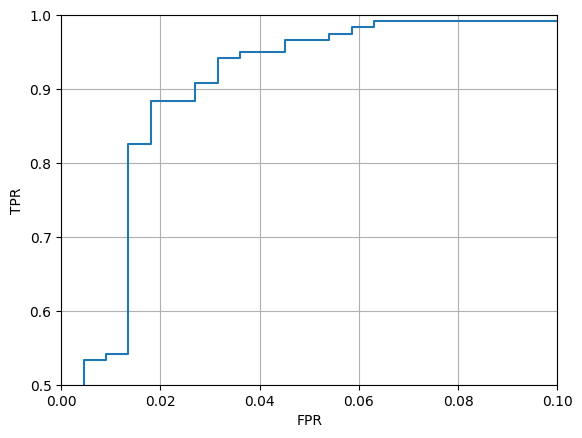

In [ ]:
# split into training and testing

Xtr,Xts, ytr, yts=train_test_split(X,y,test_size=0.5)
# scaling the data
scal=StandardScaler()
Xtr1=scal.fit_transform(Xtr)
Xts1=scal.transform(Xts)


# Fit on the scaled trained data

reg=linear_model.LogisticRegression(C=1e5)
reg.fit(Xtr1,ytr)

# predict the probability on the test data
yprob=reg.predict_proba(Xts1)

# Compute FPR and TPR
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(yts,yprob[:,1])
plt.plot(fpr,tpr)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.5,1])
plt.xlim([0,0.1])

**Finding the relation between TPR, FPR and threshold**


(0.0, 1.0)

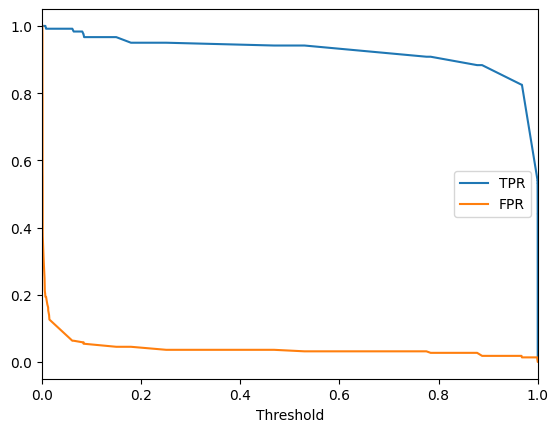

In [ ]:
plt.plot(thresholds,tpr,thresholds,fpr)
plt.legend(['TPR','FPR'])
plt.xlabel('Threshold')
plt.xlim([0,1])

In [ ]:
auc=metrics.roc_auc_score(yts,yprob[:,1])
print("AUC=%f" %auc)

AUC=0.988776
